In [1]:
import numpy as np
from matplotlib import pyplot as plt

In [138]:
cloud_file = np.genfromtxt('HORI_clouds.dat',names=True)
not_clouds = np.genfromtxt('horI_NClouds_xy.dat',names=True)
full_file = np.genfromtxt('comb_HORI',names=True)
matt_app = np.genfromtxt('../elena_cats/HOROLOGIUM_CF.2.APER.CAT',names=True)

coord_hor = np.genfromtxt('../mags0811/coordDir/HOROLOGIUM-I_F606W_coords.txt',names=True)

orig_drc = np.genfromtxt('/Users/hr8jz/Box \
Sync/Research/source_lists/HOROLOGIUM-I.dat',names=True)

In [132]:
matt_psf = np.genfromtxt('../elena_cats/HOROLOGIUM_CF.1.PSF.CAT',names=True)

In [67]:
cloud_xy = np.genfromtxt('horI_Clouds_xy.dat',names=True)
not_cl_xy = np.genfromtxt('horI_NClouds_xy.dat',names=True)

In [87]:
f606w_g1 = full_file[ (full_file['c_star_f606w'] > 0.99)]
# f814w_g1 = full_file[ (full_file['c_star_f606w'] > 0.99)]
f606w_g = f606w_g1[f606w_g1['c_star_f814w']>0.99]


# full_file[('c_star_f606w'> 0.99)& ('c_star_f814w'>0.99)]

In [112]:
cloud_arr = cloud_file[cloud_file['c_star_f606w'] >0.97]

In [113]:
not_cl_arr = not_clouds[not_clouds['c_star_f606w']>0.97]

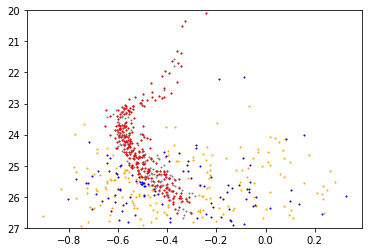

In [117]:
fig,ax = plt.subplots()

ax.scatter(cloud_file['median_f606w']-cloud_file['median_f814w'],cloud_file['median_f606w'],color='orange',s=1)
ax.scatter(cloud_arr['median_f606w']-cloud_arr['median_f814w'],cloud_arr['median_f606w'],color='blue',s=0.8)

ax.scatter(not_clouds['median_f606w']-not_clouds['median_f814w'],not_clouds['median_f606w'],color='gray',s=1)
ax.scatter(not_cl_arr['median_f606w']-not_cl_arr['median_f814w'],not_cl_arr['median_f606w'],color='red',s=0.8)

ax.set_ylim(27,20)
plt.show()

In [79]:
print('Median,Clouds:',np.median(cloud_file['c_star_f606w']),np.std(cloud_file['c_star_f606w']))
print('Median,All:',np.median(full_file['c_star_f606w']),np.std(full_file['c_star_f606w']))
print('Median,Not Clouds:',np.median(not_clouds['c_star_f606w']),np.std(not_clouds['c_star_f606w']))

Median,Clouds: 0.956 0.37025264249287837
Median,All: 0.973 0.28534666042033585
Median,Not Clouds: 0.977 0.10598799945067375


In [82]:
print("Median,Clouds",np.median(cloud_file['c_star_f814w']),np.std(cloud_file['c_star_f814w']))
print("Median,All",np.median(full_file['c_star_f814w']),np.std(full_file['c_star_f814w']))
print("Median,Not Clouds",np.median(not_clouds['c_star_f814w']),np.std(not_clouds['c_star_f814w']))

Median,Clouds 0.927 0.39318018456970244
Median,All 0.975 0.3136175248718654
Median,Not Clouds 0.981 0.10676170122550921


In [61]:
print(np.min(matt_app['x']),np.max(matt_app['x']))
print(np.min(matt_app['y']),np.max(matt_app['y']))
print(np.min(coord_hor['xr']),np.max(coord_hor['xr']))
print(np.min(coord_hor['yr']),np.max(coord_hor['yr']))

1868.9719 6445.6655
3063.7202 7246.6484
2.81 4090.0088
5.536 4088.9443


In [23]:
test_ra = np.array(cloud_file['RA_f606w'])
test_ra.shape

(280,)

In [57]:
xy_col = np.vstack((coord_hor['xr'],coord_hor['yr']))
xy_save = np.savetxt('han_xy.reg',xy_col.T,fmt='%d')

In [58]:
xy_col = np.vstack((coord_hor['xo'],coord_hor['yo']))
xy_save = np.savetxt('han_xy_off.reg',xy_col.T,fmt='%d')

In [70]:
coord_col = np.vstack((cloud_xy['xr_f606w'],cloud_xy['yr_f606w']))

In [128]:
ccol = np.vstack((cloud_file['RA_f606w'],cloud_file['DEC_f606w']))

In [71]:
coord_colNC = np.vstack((not_cl_xy['xr_f606w'],not_cl_xy['yr_f606w']))

In [130]:
nccol = np.vstack((not_clouds['RA_f606w'],not_clouds['DEC_f606w']))

In [74]:
np.savetxt('xy_clouds.reg',coord_col.T)
np.savetxt('xy_not_cl.reg',coord_colNC.T)

In [136]:
all_col = np.vstack((full_file['RA_f606w'],full_file['DEC_f606w']))

In [139]:
orig_rd = np.vstack((orig_drc['RA_v'],orig_drc['DEC_v']))
orig_xy = np.vstack((orig_drc['x_v'],orig_drc['y_v']))

In [141]:
save_xy = np.savetxt("orig_drc_xy.dat",orig_xy.T,fmt='%1.5f')

In [125]:
coord_col.T.shape

(222, 2)

In [126]:
nccol.T.shape

(506, 2)

In [73]:
print(coord_col.T[:4])

[[1066.0879   26.3584]
 [2028.785    45.0942]
 [ 284.6994   18.7628]
 [2942.9978   38.6157]]


In [41]:
matt_col = np.vstack((matt_app['x'],matt_app['y'])).T

In [133]:
matt_Rd = np.vstack((matt_psf['ra'],matt_psf['dec'])).T

In [42]:
matt_col[:5]

array([[2795.0854, 3101.5608],
       [3309.7654, 3134.7869],
       [2338.1262, 3088.2239],
       [3186.1125, 3113.3948],
       [3243.395 , 3110.2422]])

In [48]:
def writeds9point(pos,file,diam=5.0,color="red",type="point"):
    f = open(file,'w')
    f.write("# Region file format: DS9 version 4.1\n")
    f.write('global color='+color+' dashlist=8 3 width=1 font="helvetica 10 normal roman" select=1 highlite=1 dash=0 fixed=0 edit=1 move=1 delete=1 include=1 source=1\n')
    f.write("fk5\n")
    for i in range(len(pos)):
        f.write('circle('+str(pos[i][0])+','+str(pos[i][1])+','+str(diam)+'"'+') \n')
    f.close()

    return None

#"pos" variable is expected to be a two column numpy array with the RA coordinates (in degrees) in first
# Dec coordinates (in degrees) in the second column. 
#The "file" is the full file name where you want the file to be written

In [129]:
writeds9point(ccol.T,"HORI_coords_rd.reg",\
              diam=0.8,color="red",type="point")

In [131]:
writeds9point(nccol.T,"HORI_coords_NC_rd.reg",\
              diam=0.8,color="cyan",type="point")

In [142]:
writeds9point(orig_rd.T,"orig_han_rd.reg",\
              diam=0.3,color="green",type="point")

In [137]:
writeds9point(all_col.T,"all_han_rd.reg",\
              diam=0.3,color="blue",type="point")

In [ ]:
writeds9point(all_col.T,"all_han_rd.reg",\
              diam=0.3,color="blue",type="point")

In [140]:
save_out = np.savetxt('matt_xy.reg',matt_col,fmt='%1.3f')

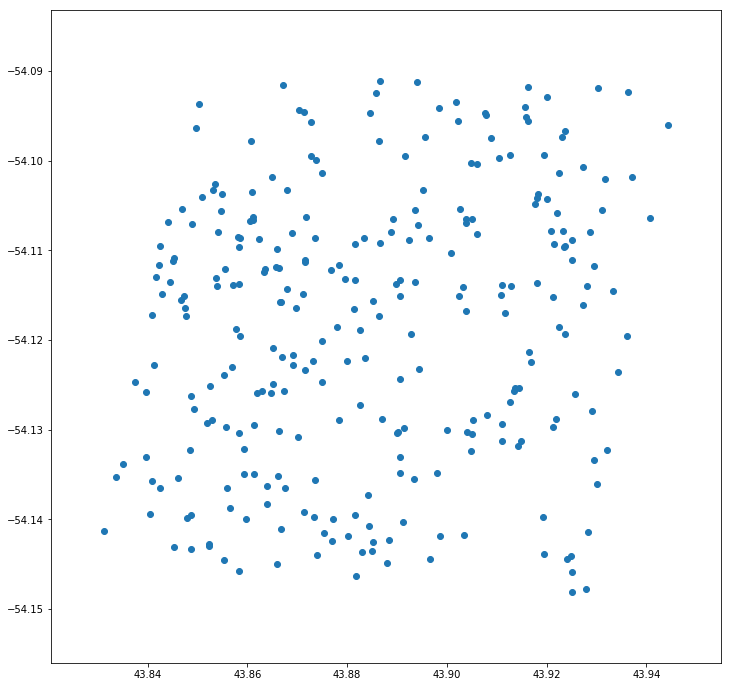

In [6]:
fig,ax = plt.subplots(figsize=(12,12))

ax.scatter(cloud_file['RA_f606w'],cloud_file['DEC_f606w'])
plt.show()